<a href="https://colab.research.google.com/github/Mateo289/Sistemas_Dinamicos_Control/blob/main/Simulaciones/simulacion_1_9_Mayo_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install control


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 12.4 MB/s eta 0:00:00


Sistema masa-resorte-amortiguador:
<TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


s^2 + 1.833 s + 0.6667
----------------------
s^2 + 2.167 s + 0.6667


Circuito RC doble:
<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


s^2 + 2 s + 1
-------------
s^2 + 4 s + 1



/usr/local/lib/python3.11/dist-packages/control/timeresp.py:1975: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


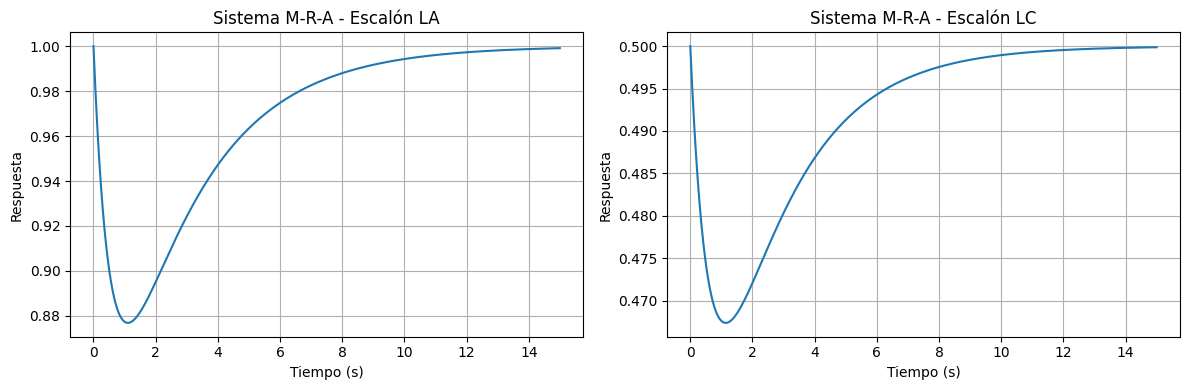

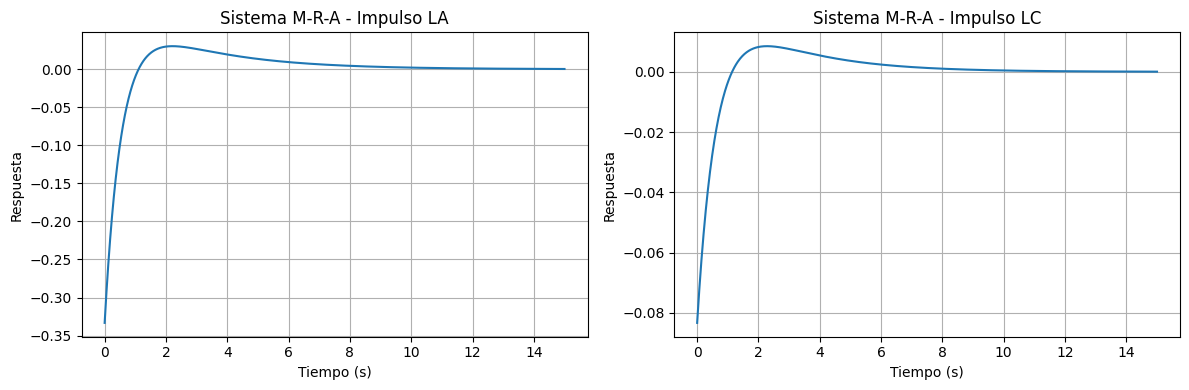

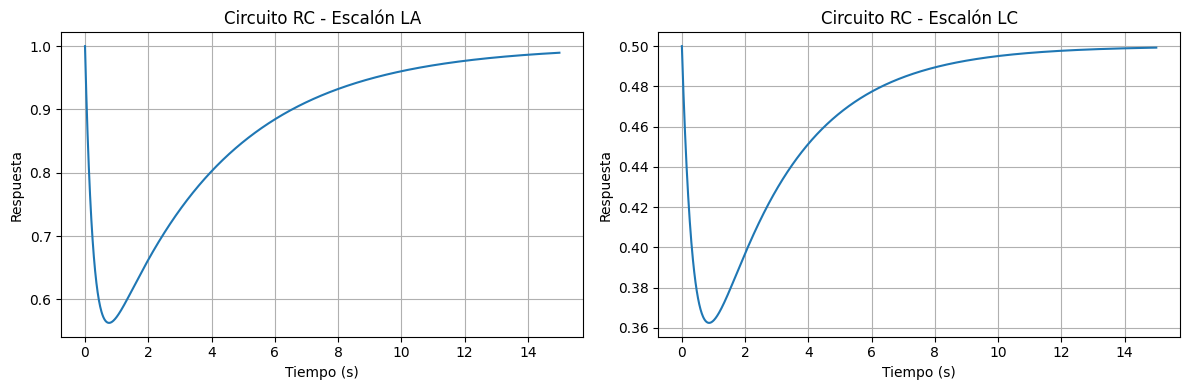

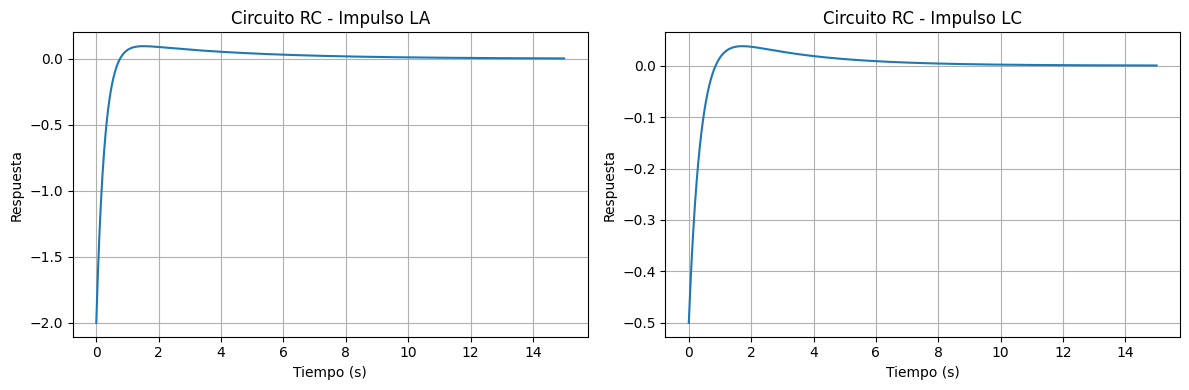

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definición de parámetros del sistema masa-resorte-amortiguador
b1, b2 = 2.0, 0.5
k1, k2 = 1.5, 1.0

# Definición de parámetros del circuito RC
R1, R2 = 1.0, 2.0
C1, C2 = 1.0, 0.5

# --- FUNCIONES DE TRANSFERENCIA COMPLETAS ---
# Para el sistema masa-resorte-amortiguador:
# G1(s) = (s^2 + 1.833*s + 0.667) / (s^2 + 2.167*s + 0.667)
num1 = [1, (b1/k1 + b2/k2), (b1*b2)/(k1*k2)]               # [1, 1.833, 0.667]
den1 = [1, (b1/k1 + b2/k2 + b2/k1), (b1*b2)/(k1*k2)]       # [1, 2.167, 0.667]
G1 = ctrl.tf(num1, den1)
G1_cl = ctrl.feedback(G1, 1)
print("Sistema masa-resorte-amortiguador:")
print(ctrl.tf(num1, den1).__str__())

# Para el circuito RC doble:
# G2(s) = (s^2 + 2*s + 1) / (s^2 + 4*s + 1)
num2 = [1, (1/(R2*C2) + 1/(R1*C1)), 1/(R1*C1*R2*C2)]        # [1, 2.0, 1.0]
den2 = [1, (1/(R2*C2) + 1/(R1*C1) + 1/(R1*C2)), 1/(R1*C1*R2*C2)] # [1, 4.0, 1.0]
G2 = ctrl.tf(num2, den2)
G2_cl = ctrl.feedback(G2, 1)
print("\nCircuito RC doble:")
print(ctrl.tf(num2, den2).__str__())

# Tiempo de simulación
t = np.linspace(0, 15, 1501)

# Simulación masa-resorte
_, y1_step = ctrl.step_response(G1, t)
_, y1_step_cl = ctrl.step_response(G1_cl, t)
_, y1_imp = ctrl.impulse_response(G1, t)
_, y1_imp_cl = ctrl.impulse_response(G1_cl, t)

# Simulación circuito RC
_, y2_step = ctrl.step_response(G2, t)
_, y2_step_cl = ctrl.step_response(G2_cl, t)
_, y2_imp = ctrl.impulse_response(G2, t)
_, y2_imp_cl = ctrl.impulse_response(G2_cl, t)

# Gráficas para sistema masa-resorte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y1_step, label='Escalón LA')
plt.title('Sistema M-R-A - Escalón LA')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, y1_step_cl, label='Escalón LC')
plt.title('Sistema M-R-A - Escalón LC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y1_imp, label='Impulso LA')
plt.title('Sistema M-R-A - Impulso LA')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, y1_imp_cl, label='Impulso LC')
plt.title('Sistema M-R-A - Impulso LC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráficas para circuito RC
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y2_step, label='Escalón LA')
plt.title('Circuito RC - Escalón LA')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, y2_step_cl, label='Escalón LC')
plt.title('Circuito RC - Escalón LC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y2_imp, label='Impulso LA')
plt.title('Circuito RC - Impulso LA')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, y2_imp_cl, label='Impulso LC')
plt.title('Circuito RC - Impulso LC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)
plt.tight_layout()
plt.show()


Sistema masa-resorte-amortiguador:
<TransferFunction>: sys[19]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


s^2 + 1.833 s + 0.667
---------------------
s^2 + 2.167 s + 0.667


Circuito RC doble:
<TransferFunction>: sys[20]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


s^2 + 2 s + 1
-------------
s^2 + 4 s + 1


Sistema hidráulico (tanques):
<TransferFunction>: sys[16]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        0.3188
----------------------
s^2 + 1.143 s + 0.3188



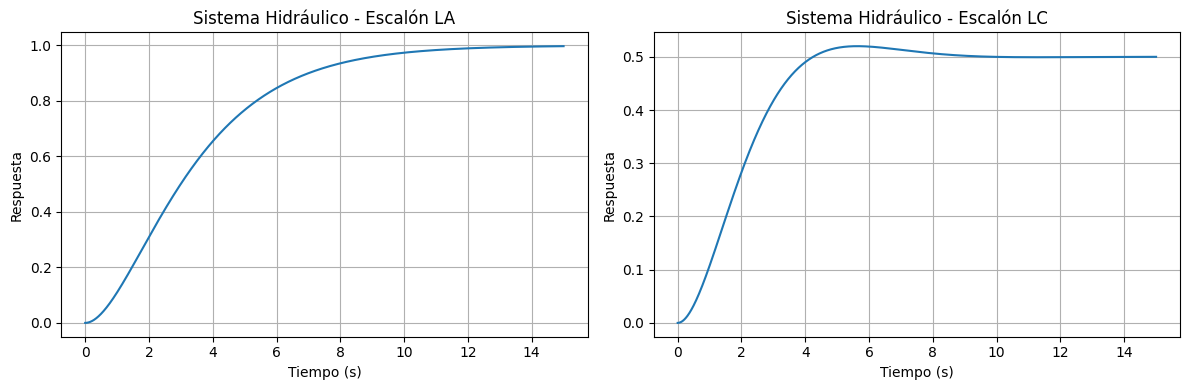

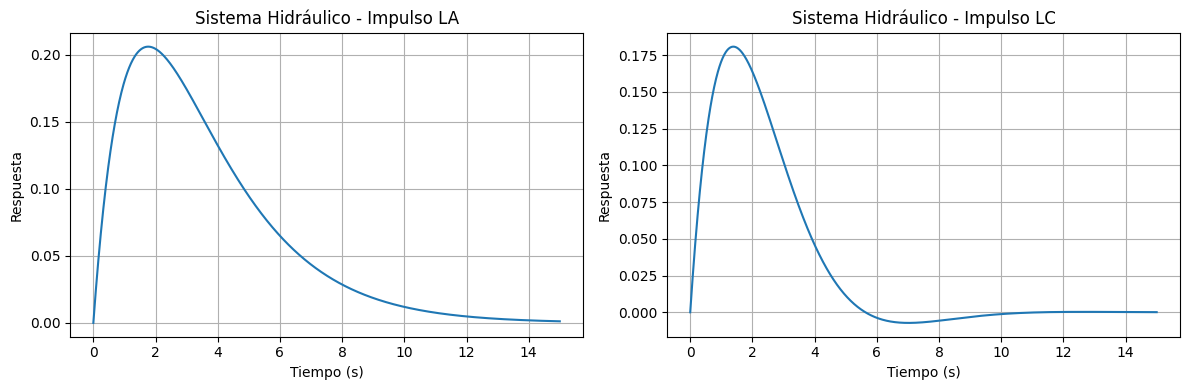

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definición de parámetros del sistema masa-resorte-amortiguador
b1, b2 = 2.0, 0.5
k1, k2 = 1.5, 1.0

# Definición de parámetros del circuito RC
R1, R2 = 1.0, 2.0
C1, C2 = 1.0, 0.5

# Función de transferencia del sistema hidráulico (ecuación 13): G(s) = 0.3188 / (s^2 + 1.143s + 0.3188)
num3 = [0.3188]
den3 = [1, 1.143, 0.3188]
G3 = ctrl.tf(num3, den3)
G3_cl = ctrl.feedback(G3, 1)

print("Sistema masa-resorte-amortiguador:")
print(ctrl.tf([1, 1.833, 0.667], [1, 2.167, 0.667]))
print("\nCircuito RC doble:")
print(ctrl.tf([1, 2.0, 1.0], [1, 4.0, 1.0]))
print("\nSistema hidráulico (tanques):")
print(G3)

# Tiempo de simulación
t = np.linspace(0, 15, 1501)

# Simulaciones para sistema hidráulico (ec. 13)
_, y3_step = ctrl.step_response(G3, t)
_, y3_step_cl = ctrl.step_response(G3_cl, t)
_, y3_imp = ctrl.impulse_response(G3, t)
_, y3_imp_cl = ctrl.impulse_response(G3_cl, t)

# Gráficas para sistema hidráulico
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y3_step, label='Escalón LA')
plt.title('Sistema Hidráulico - Escalón LA')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, y3_step_cl, label='Escalón LC')
plt.title('Sistema Hidráulico - Escalón LC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y3_imp, label='Impulso LA')
plt.title('Sistema Hidráulico - Impulso LA')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, y3_imp_cl, label='Impulso LC')
plt.title('Sistema Hidráulico - Impulso LC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)
plt.tight_layout()
plt.show()